In [1]:
# IMPORTAÇÕES

import spacy
import regex as re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import spatial
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import csr_matrix
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
import networkx as nx

# Dataframe com os documentos

In [2]:
dados1 = pd.read_excel('data/1-1000.xls')
dados2 = pd.read_excel('data/1001-2000.xls')
dados3 = pd.read_excel('data/2001-3000.xls')
dados4 = pd.read_excel('data/3001-4000.xls')
dados5 = pd.read_excel('data/4001-5000.xls')
dados6 = pd.read_excel('data/5001-6000.xls')
dados7 = pd.read_excel('data/6001-7000.xls')
dados8 = pd.read_excel('data/7001-8000.xls')
dados9 = pd.read_excel('data/8001-9000.xls')
dados10 = pd.read_excel('data/9001-10000.xls')

Concatenar todos arquivos:

In [3]:
dados_total = pd.concat([dados1, dados2, dados3, dados4, dados5, dados6, dados7, dados8, dados9, dados10], ignore_index=True)
dados_total['Abstract'] = dados_total['Abstract'].astype(str)

In [4]:
print(dados_total['Abstract'])

0       The article aims to describe the problem relat...
1       Microplastic pollution is a global crisis. Thi...
2       The contamination of microplastics in aquatic ...
3       The increasing demand for plastic in our daily...
4       Microplastic (<5 mm) pollution has been docume...
                              ...                        
9995    Microplastics and also nanoplastics are tiny p...
9996    Polystyrene (PS) is selected as a representati...
9997    Plastic microbeads are often added to personal...
9998    The nature of micro- and nanoplastics and thei...
9999    The degradation of plastic debris may result i...
Name: Abstract, Length: 10000, dtype: object


In [49]:
def remove_numerical_and_special_words(abstract):
    # Define a regular expression pattern to match words containing numerical values, '>' or '<', or just one special character
    pattern = r'\b(?:\w*\d\w*|\d+\w+|\W{1}|\(<|=|\+|\$|nan|\+|�||ța|\.\.\.)\b'
    cleaned_abstract = re.sub(pattern, lambda m: m.group() if m.group().isspace() else '', abstract)
    return cleaned_abstract

# Apply the remove_numerical_and_special_words function to each abstract in the DataFrame
dados_total['Abstract'] = dados_total['Abstract'].apply(remove_numerical_and_special_words)

In [50]:
print(dados_total['Abstract'])

0       The article aims to describe the problem relat...
1       Microplastic pollution is a global crisis. Thi...
2       The contamination of microplastics in aquatic ...
3       The increasing demand for plastic in our daily...
4       Microplastic (< mm) pollution has been documen...
                              ...                        
9995    Microplastics and also nanoplastics are tiny p...
9996    Polystyrene (PS) is selected as a representati...
9997    Plastic microbeads are often added to personal...
9998    The nature of micro- and nanoplastics and thei...
9999    The degradation of plastic debris may result i...
Name: Abstract, Length: 10000, dtype: object


In [7]:
inicio = 0
fim = len(dados_total['Abstract'])

corpus = []

Abstracts = dados_total['Abstract'][inicio:fim]

for abstract in Abstracts:
    abst = str(abstract)
    corpus.append(abst)
    
Article_title = dados_total['Article Title'][inicio:fim]
    
titles = []
for tls in Article_title:
    titles.append(str(tls))
        
print(type(corpus), type(corpus[0]), type(titles), type(corpus))

<class 'list'> <class 'str'> <class 'list'> <class 'list'>


# Bag-of-words

In [8]:
# Para construir uma basic bag-of-words - cria uma matriz de contagens de tokens

vectorizer = CountVectorizer()

In [9]:
# Aprende o vocabulário do documento e retorna uma matriz documento X token

bow = vectorizer.fit_transform(corpus)
print(type(bow))

# print(bow)

<class 'scipy.sparse._csr.csr_matrix'>


In [10]:
# Features
# print(vectorizer.get_feature_names_out())

# Dicionário de vocabulário
vectorizer.vocabulary_

{'the': 37567,
 'article': 2264,
 'aims': 914,
 'to': 38108,
 'describe': 9203,
 'problem': 30092,
 'related': 31764,
 'possibility': 29454,
 'of': 25790,
 'secondary': 33493,
 'contamination': 7330,
 'tap': 37112,
 'water': 40562,
 'with': 41058,
 'microplastic': 22225,
 'particles': 26999,
 'samples': 32976,
 'were': 40839,
 'collected': 6594,
 'in': 17169,
 'situ': 34557,
 'minimal': 22695,
 'risk': 32454,
 'external': 12411,
 'from': 13944,
 'individual': 17352,
 'consumers': 7281,
 'located': 20106,
 'upper': 39692,
 'silesia': 34345,
 'agglomeration': 798,
 'it': 18369,
 'was': 40511,
 'shown': 34212,
 'that': 37552,
 'present': 29908,
 'each': 10647,
 'points': 28875,
 'covered': 7800,
 'by': 4759,
 'research': 32008,
 'amounts': 1436,
 'ranging': 31174,
 'several': 33932,
 'dozen': 10351,
 'thousand': 37812,
 'per': 27534,
 'cubic': 8155,
 'meter': 21677,
 'for': 13605,
 'sample': 32970,
 'and': 1594,
 'microplastics': 22301,
 'form': 13664,
 'fibers': 12927,
 'dominated': 1019

In [11]:
nlp = spacy.load('en_core_web_sm')

def spacy_tokenizer(doc):
    return [t.text for t in nlp(doc) if not t.is_punct]

In [12]:
vectorizer = CountVectorizer(tokenizer=spacy_tokenizer, lowercase=False, binary=True)
bow = vectorizer.fit_transform(corpus)

C:\Users\marcos220057\AppData\Roaming\Python\Python310\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [13]:
# print(vectorizer.get_feature_names_out())
vectorizer.vocabulary_

{'The': 14857,
 'article': 18043,
 'aims': 17061,
 'to': 45739,
 'describe': 23416,
 'the': 45313,
 'problem': 39457,
 'related': 40732,
 'possibility': 38933,
 'of': 36145,
 'secondary': 42036,
 'contamination': 21924,
 'tap': 45006,
 'water': 47648,
 'with': 48073,
 'microplastic': 33564,
 'particles': 37131,
 'Samples': 13384,
 'were': 47896,
 'collected': 21214,
 'in': 29697,
 'situ': 42900,
 'minimal': 33983,
 'risk': 41339,
 'external': 26062,
 'from': 27344,
 'individual': 29875,
 'consumers': 21874,
 'located': 31881,
 'Upper': 15512,
 'Silesia': 13798,
 'Agglomeration': 737,
 'It': 6992,
 'was': 47601,
 'shown': 42627,
 'that': 45299,
 'present': 39294,
 'each': 24621,
 'points': 38421,
 'covered': 22336,
 'by': 19848,
 'research': 40969,
 'amounts': 17439,
 'ranging': 40212,
 'several': 42408,
 'dozen': 24388,
 'thousand': 45515,
 'per': 37447,
 'cubic': 22561,
 'meter': 33074,
 'In': 6698,
 'samples': 41666,
 'for': 27056,
 'Sample': 13381,
 'Points': 11775,
 ' ': 0,
 'and':

In [14]:
#print('Matriz binária de termos presentes (1) ou ausentes (0) na sentença')
#print(bow.toarray())
#print()
#print('Índice e fatiamento')
#print(bow[0])
#print()
#print(bow[0:4])

# Similaridade

In [15]:
doc1_vs_doc2 = 1 - spatial.distance.cosine(bow[0].toarray()[0], bow[1].toarray()[0])
doc1_vs_doc3 = 1 - spatial.distance.cosine(bow[0].toarray()[0], bow[2].toarray()[0])
doc1_vs_doc4 = 1 - spatial.distance.cosine(bow[0].toarray()[0], bow[3].toarray()[0])

#print(corpus)

#print(f"Doc 1 vs Doc 2: {doc1_vs_doc2}")
#print(f"Doc 1 vs Doc 3: {doc1_vs_doc3}")
#print(f"Doc 1 vs Doc 4: {doc1_vs_doc4}")

In [16]:
#print(cosine_similarity(bow))

# N-grams

In [17]:
vectorizer = CountVectorizer(tokenizer=spacy_tokenizer, lowercase=False, binary=True, ngram_range=(1,2))
bigrams = vectorizer.fit_transform(corpus)
#print(vectorizer.get_feature_names_out())
#print('Number of features: {}'.format(len(vectorizer.get_feature_names_out())))
#print(vectorizer.vocabulary_)

# TF-IDF

In [18]:
# Baixa o modelo de linguagem em inglês
nlp = spacy.load('en_core_web_sm')
type(nlp)

spacy.lang.en.English

In [19]:
unwanted_pipes = ["ner", "parser"]

In [20]:
# Filtro para remover pontuação e espaço

def spacy_tokenizer(doc):
    with nlp.disable_pipes(*unwanted_pipes):
        return [t.text for t in nlp(doc) if not t.is_punct and not t.is_space and not t.is_stop]

In [21]:
# TfidfVectorizer converte um conjunto de textos em uma matriz de features TF-IDF

vectorizer = TfidfVectorizer(tokenizer=spacy_tokenizer)
features = vectorizer.fit_transform(corpus)
words = vectorizer.get_feature_names_out()

print(features)

  (0, 25254)	0.09142702163220644
  (0, 3614)	0.06004294124021065
  (0, 15660)	0.09398153271344109
  (0, 507)	0.07792006080743984
  (0, 7390)	0.09039254572591172
  (0, 2247)	0.0967402906044278
  (0, 32912)	0.08232297933756144
  (0, 11489)	0.08001571685909684
  (0, 9701)	0.0605249204857442
  (0, 534)	0.08381523212066978
  (0, 25129)	0.05703499349293467
  (0, 17790)	0.07194222638983752
  (0, 37788)	0.10951056066612279
  (0, 37418)	0.28507961022040756
  (0, 29047)	0.10772535251977516
  (0, 29227)	0.03186935472911833
  (0, 12200)	0.0916425203003631
  (0, 26921)	0.07800938223791246
  (0, 2729)	0.09767438893352429
  (0, 37455)	0.04031574312371186
  (0, 18230)	0.23806855763833948
  (0, 40138)	0.12037494172844931
  (0, 4442)	0.06523844222299716
  (0, 39324)	0.07200276832865803
  (0, 5986)	0.08546766091452995
  :	:
  (9999, 26328)	0.049980608298857164
  (9999, 32176)	0.050951164628173284
  (9999, 7234)	0.058468114176195234
  (9999, 13395)	0.05409858437579394
  (9999, 20358)	0.050951164628173284


In [22]:
print(vectorizer.vocabulary_)

{'article': 2561, 'aims': 1214, 'describe': 9582, 'problem': 30829, 'related': 32538, 'possibility': 30173, 'secondary': 34289, 'contamination': 7687, 'tap': 37937, 'water': 41376, 'microplastic': 22774, 'particles': 27643, 'samples': 33765, 'collected': 6945, 'situ': 35365, 'minimal': 23253, 'risk': 33235, 'external': 12798, 'individual': 17817, 'consumers': 7637, 'located': 20621, 'upper': 40500, 'silesia': 35152, 'agglomeration': 1098, 'shown': 35012, 'present': 30643, 'points': 29580, 'covered': 8155, 'research': 32783, 'amounts': 1732, 'ranging': 31949, 'dozen': 10732, 'thousand': 38621, 'cubic': 8516, 'meter': 22215, 'sample': 33759, 'microplastics': 22852, 'form': 14078, 'fibers': 13335, 'dominated': 10579, 'fragments': 14256, 'point': 29569, 'division': 10465, 'colour': 7028, 'characteristic': 5986, 'transparent': 39324, 'blue': 4442, 'underground': 40138, 'intakes': 18230, 'surface': 37455, 'assumed': 2729, 'origin': 26921, 'erosion': 12200, 'plastic': 29227, 'pipes': 29047, '

In [23]:
# Quantidade de tokes únicos

print(len(vectorizer.get_feature_names_out()))

42415


In [24]:
# Dimensão da matriz gerada sentença X token

print(features.shape)
print(features.toarray())

(10000, 42415)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [25]:
features[:][0].shape

(1, 42415)

In [26]:
print(features)

  (0, 25254)	0.09142702163220644
  (0, 3614)	0.06004294124021065
  (0, 15660)	0.09398153271344109
  (0, 507)	0.07792006080743984
  (0, 7390)	0.09039254572591172
  (0, 2247)	0.0967402906044278
  (0, 32912)	0.08232297933756144
  (0, 11489)	0.08001571685909684
  (0, 9701)	0.0605249204857442
  (0, 534)	0.08381523212066978
  (0, 25129)	0.05703499349293467
  (0, 17790)	0.07194222638983752
  (0, 37788)	0.10951056066612279
  (0, 37418)	0.28507961022040756
  (0, 29047)	0.10772535251977516
  (0, 29227)	0.03186935472911833
  (0, 12200)	0.0916425203003631
  (0, 26921)	0.07800938223791246
  (0, 2729)	0.09767438893352429
  (0, 37455)	0.04031574312371186
  (0, 18230)	0.23806855763833948
  (0, 40138)	0.12037494172844931
  (0, 4442)	0.06523844222299716
  (0, 39324)	0.07200276832865803
  (0, 5986)	0.08546766091452995
  :	:
  (9999, 26328)	0.049980608298857164
  (9999, 32176)	0.050951164628173284
  (9999, 7234)	0.058468114176195234
  (9999, 13395)	0.05409858437579394
  (9999, 20358)	0.050951164628173284


In [27]:
df_tf_idf = pd.DataFrame(features.toarray(), columns = words)
df_tf_idf.T

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
$,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
(=,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
+,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.230662,0.0,0.0,0.0
",biogas",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
",chemical",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
~%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
⇋,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
⠁,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [28]:
def TF_IDF_func_presrntation(Num):
    DF = df_tf_idf.T[Num].nlargest(10)
    print( 'Doc number ' , Num+1)
    print( 30*'-')
    return DF

print(TF_IDF_func_presrntation(5))

Doc number  6
------------------------------
oceanbased       0.199355
microplastics    0.185402
comprise         0.163522
tonnes           0.157710
sources          0.154764
cytotoxicity     0.145952
landbased        0.140989
immune           0.134707
remediation      0.129529
plastic          0.128644
Name: 5, dtype: float64


# SVD

In [29]:
svd = TruncatedSVD(n_components=3)
lsa = svd.fit_transform(features)

topic_encoded_df = pd.DataFrame(lsa, columns = ["topic_1", "topic_2", "topic_3"])
topic_encoded_df["titles"] = titles
display(topic_encoded_df[["titles","topic_1", "topic_2", "topic_3"]])

,titles,topic_1,topic_2,topic_3,topic_4,topic_5
0,Microplastic in tap water - preliminary tests,2.052845e-06,0.211870,-0.098044,-0.094706,0.045102
1,Promising indicators for monitoring microplast...,7.826917e-07,0.199107,-0.109271,0.003680,-0.013445
2,Nanomaterials for microplastic remediation fro...,6.953725e-07,0.188210,-0.071000,0.059673,-0.026707
3,Atmospheric microplastic and nanoplastic: The ...,9.393559e-07,0.251286,-0.093604,0.104179,-0.128850
4,Variability in the drivers of microplastic con...,1.431869e-06,0.258668,-0.109026,-0.090439,-0.102568
...,...,...,...,...,...,...
9995,Micro- and Nanoplastics in Environment: Degrad...,9.207193e-07,0.204817,-0.095110,0.120682,-0.137534
9996,"Low-toxic, fluorescent labeled and size-contro...",7.058157e-07,0.102245,0.002955,-0.010199,-0.001770
9997,Characterisation of plastic microbeads in faci...,3.574039e-07,0.138274,-0.043254,0.011190,-0.028165
9998,"Source, distribution and emerging threat of mi...",5.705631e-07,0.167120,-0.070995,0.119283,-0.158745


In [30]:
encoding_matrix = pd.DataFrame(svd.components_,
                               index=["topic_1", "topic_2", "topic_3"],
                               columns=words).T
encoding_matrix

,topic_1,topic_2,topic_3,topic_4,topic_5
$,3.901616e-10,0.000404,-0.000477,0.000670,-0.000977
(=,3.777072e-10,0.000155,-0.000100,-0.000340,0.000100
+,1.401082e-06,0.097740,0.042238,-0.164844,0.095073
",biogas",2.066578e-11,0.000024,-0.000038,0.000042,-0.000067
",chemical",1.874380e-10,0.000084,-0.000085,0.000143,-0.000087
...,...,...,...,...,...
~%,4.364676e-10,0.000258,0.000112,-0.000265,0.000402
⇋,1.593748e-10,0.000078,0.000271,0.000060,0.000126
⠁,5.933725e-11,0.000065,-0.000047,0.000082,0.000068
,9.728582e-10,0.000691,-0.000198,-0.001097,0.000185


In [31]:
list_of_topics = ["topic_1", "topic_2", "topic_3"]

for topic in list_of_topics:
    encoding_matrix[topic] = np.abs(encoding_matrix[topic])

for i in range(1,6):
    print(f"TOPICO {i}:")
    print()
    print(encoding_matrix.sort_values(f"topic_{i}", ascending=False)[:10])
    print()

TOPICO 1:

            topic_1   topic_2   topic_3   topic_4   topic_5
nan        1.000000  0.000007  0.000004  0.000003  0.000002
sdi        0.000010  0.000372  0.001023  0.000939  0.000750
swi        0.000010  0.000372  0.001023  0.000939  0.000750
mps        0.000005  0.297740  0.821374  0.051719  0.054440
urban      0.000005  0.034348  0.002910  0.046359  0.049761
itemskg(-  0.000005  0.002089  0.001778  0.003747  0.006385
diversity  0.000004  0.017866  0.001631  0.022992  0.026861
yushan     0.000004  0.000149  0.000409  0.000375  0.000300
river      0.000004  0.066920  0.013124  0.149063  0.091049
yangtze    0.000004  0.008278  0.000134  0.018409  0.018035

TOPICO 2:

                    topic_1   topic_2   topic_3   topic_4   topic_5
mps            5.179754e-06  0.297740  0.821374  0.051719  0.054440
microplastics  6.796642e-07  0.296342  0.311052  0.027993  0.131643
microplastic   5.546464e-07  0.190104  0.188083  0.079573  0.056695
mp             2.579683e-06  0.159523  0.2744

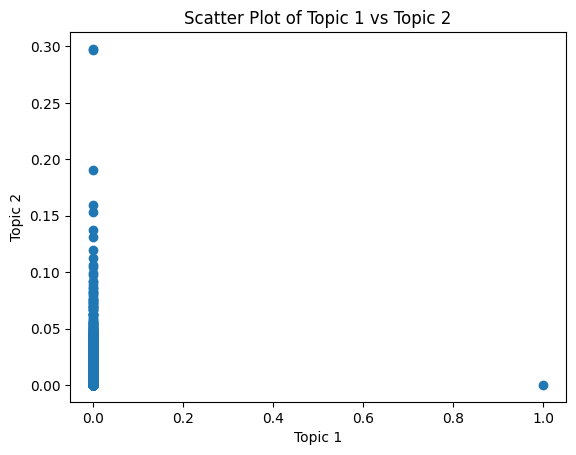

In [32]:
fig, ax = plt.subplots()

ax.scatter(encoding_matrix["topic_1"], encoding_matrix["topic_2"])

ax.set_xlabel('Topic 1')
ax.set_ylabel('Topic 2')
ax.set_title('Scatter Plot of Topic 1 vs Topic 2')

plt.show()

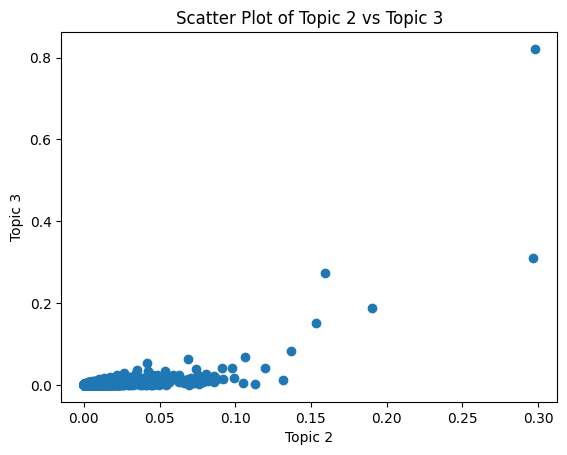

In [33]:
fig, ax = plt.subplots()

ax.scatter(encoding_matrix["topic_2"], encoding_matrix["topic_3"])

ax.set_xlabel('Topic 2')
ax.set_ylabel('Topic 3')
ax.set_title('Scatter Plot of Topic 2 vs Topic 3')

plt.show()

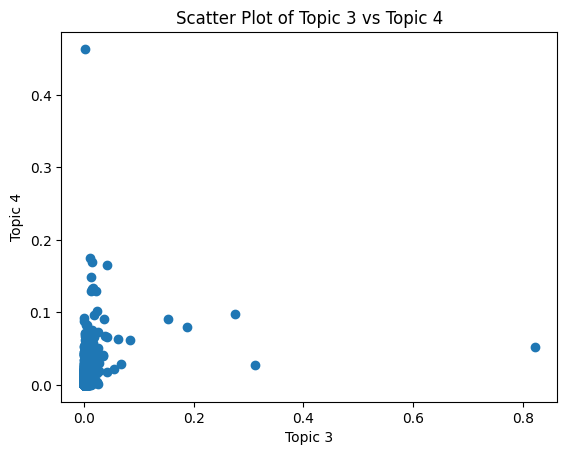

In [34]:
fig, ax = plt.subplots()

ax.scatter(encoding_matrix["topic_3"], encoding_matrix["topic_4"])

ax.set_xlabel('Topic 3')
ax.set_ylabel('Topic 4')
ax.set_title('Scatter Plot of Topic 3 vs Topic 4')

plt.show()

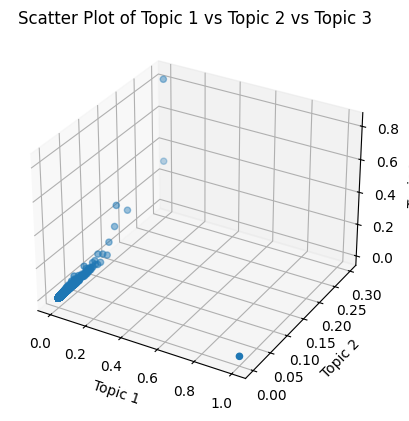

In [35]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(encoding_matrix["topic_1"].values, encoding_matrix["topic_2"].values, encoding_matrix["topic_3"].values)

ax.set_xlabel('Topic 1')
ax.set_ylabel('Topic 2')
ax.set_zlabel('Topic 3')
ax.set_title('Scatter Plot of Topic 1 vs Topic 2 vs Topic 3')

plt.show()

In [36]:
svd = TruncatedSVD(n_components=4)
kmeans = KMeans(n_clusters=4)
pipeline = make_pipeline(svd, kmeans)
pipeline.fit(features)
labels = pipeline.predict(features)

In [37]:
df = pd.DataFrame({'labels': labels, 'docs': titles, 'abstract': corpus})
print(df.sort_values('labels'))

      labels                                               docs  \
2264       0  Microplastic abundance, characteristics, and r...   
2724       0  Synthetic microfibers in marine sediments and ...   
2725       0  Microplastic accumulation in the gastrointesti...   
2726       0  Microplastic removal in batch and dynamic coag...   
2727       0  Marine Biodegradation Behavior of Wool and Oth...   
...      ...                                                ...   
1409       3  Microplastic particle emission from wastewater...   
5847       3  Plastic contamination of forest, urban, and ag...   
8101       3  Variation of microplastics in the shore sedime...   
5845       3  Potential Threat of Microplastics to Zooplankt...   
0          3      Microplastic in tap water - preliminary tests   

                                               abstract  
2264                                                nan  
2724                                                nan  
2725                 

In [38]:
df.to_excel('topics.xlsx')

C:\Users\marcos220057\AppData\Local\Temp\ipykernel_21044\2443923299.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.annotate(word, (top30_combined["topic_3"][i], top30_combined["topic_4"][i]))


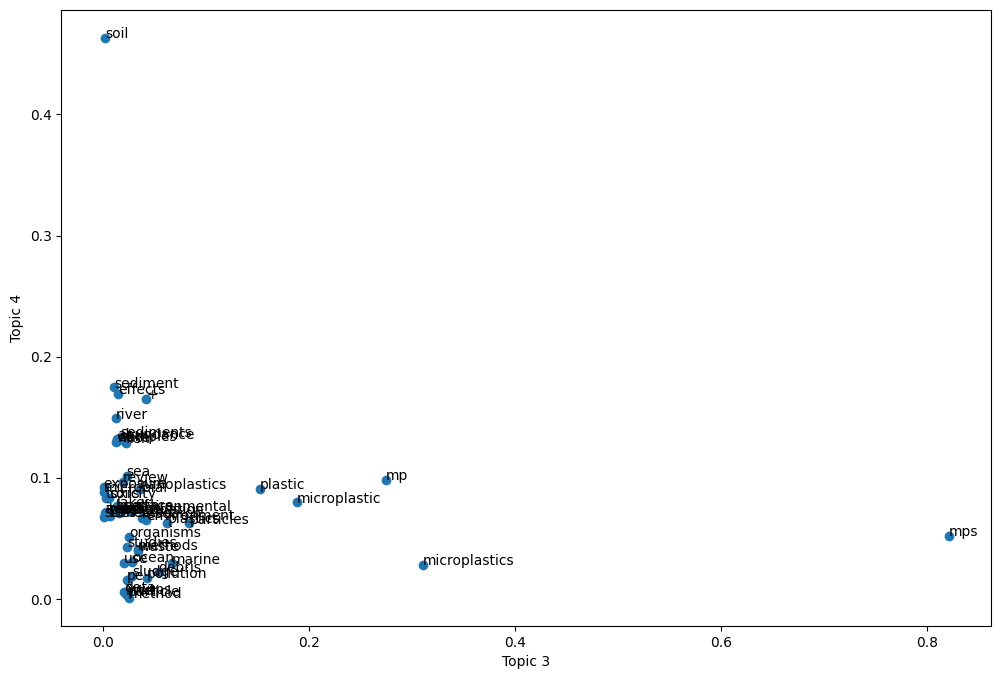

In [39]:
# Filtering the top 30 values for topic 3 and topic 4
top30_topic3 = encoding_matrix.nlargest(30, 'topic_3')
top30_topic4 = encoding_matrix.nlargest(30, 'topic_4')
top30_combined = pd.concat([top30_topic3, top30_topic4]).drop_duplicates()
# Creating the plot
fig, ax = plt.subplots(figsize=(12, 8))
# Scatter plot
ax.scatter(top30_combined["topic_3"], top30_combined["topic_4"])
# Annotating each point
for i, word in enumerate(top30_combined.index):
    ax.annotate(word, (top30_combined["topic_3"][i], top30_combined["topic_4"][i]))
# Setting labels and title
ax.set_xlabel('Topic 3')
ax.set_ylabel('Topic 4')
# Show plot
plt.show()

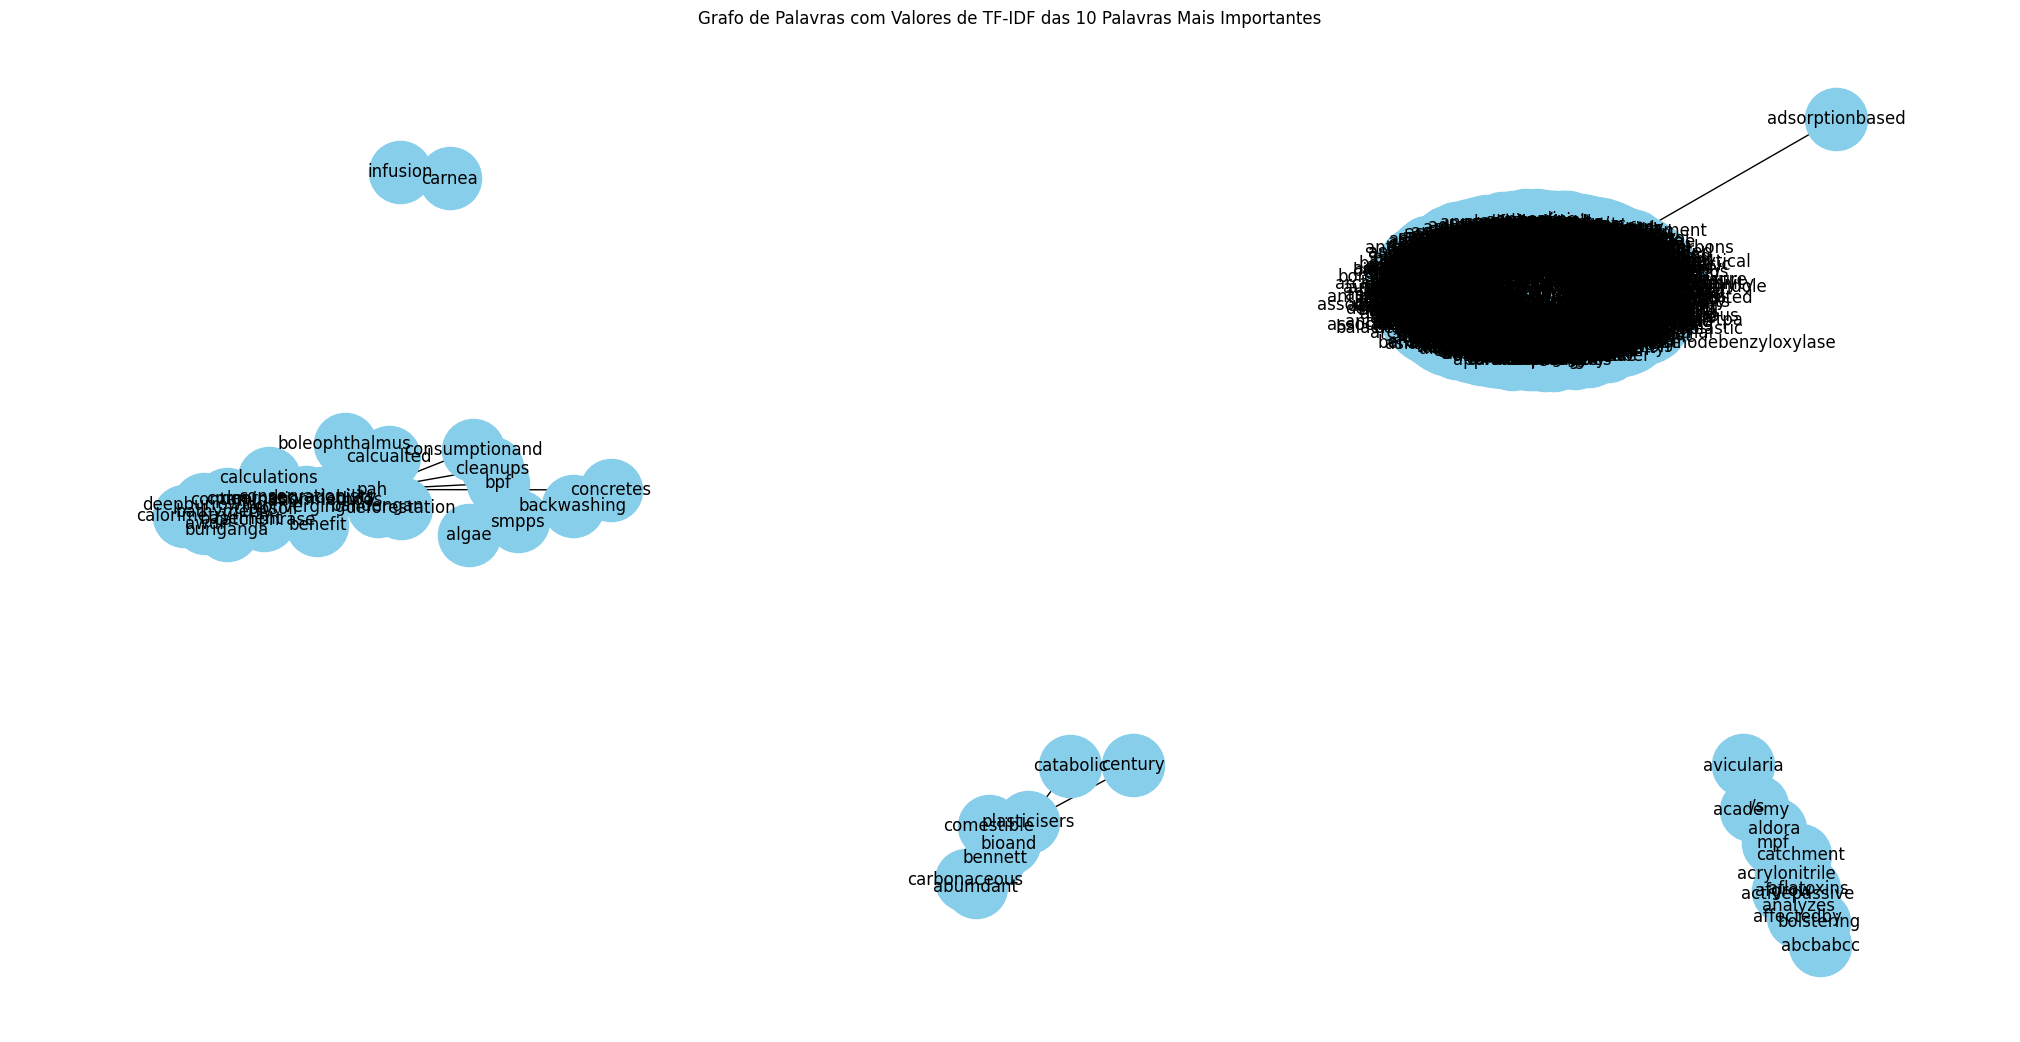

In [40]:

top_indices = np.argsort(features.max(axis=0).toarray()[0])[-6:]

# Criar um grafo
G = nx.Graph()

# Adicionar nós ao grafo
for i in top_indices:
    G.add_node(words[i])

# Adicionar arestas ponderadas com base nos valores de TF-IDF
for i, j in zip(*features.nonzero()):
    if i and j in top_indices and i != j:  # Evitar loops e arestas entre o mesmo nó
        weight = features[i, j].item() # Obter o valor TF-IDF como um número, não como um array
        G.add_edge(words[i], words[j], weight=round(weight,2))
        
# Visualizar o grafo
plt.figure(figsize=(20, 10))
pos = nx.spring_layout(G)  # Layout para visualização
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=12)
labels = nx.get_edge_attributes(G, 'labels')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title('Grafo de Palavras com Valores de TF-IDF das 10 Palavras Mais Importantes')
plt.show()

Fazer grafo com as palavras e a relação entre elas

# Consulta de dados

In [41]:
# Transforma o termo buscado "query" em um vetor TF-IDF.

query = ["band gap"]
query_tfidf = vectorizer.transform(query)

In [42]:
# Calcula a similaridade pelo cosseno entre os vetores de cada documento
# O método flatten() retorna apenas uma lista, ao invés de uma lista de listas

cosine_similarities = cosine_similarity(features, query_tfidf).flatten()

In [43]:
# O método argsort() retorna uma lista de índices em ordem crescente
# A função retorna o último índice da lista

def top_k(arr, k):
    kth_largest = (k + 1) * -1
    return np.argsort(arr)[:kth_largest:-1]

In [44]:
#Apresenta as 5 primeiros sentenças da lista

top_related_indices = top_k(cosine_similarities, 5)
print(top_related_indices)

[ 499  795 8264 8844 7586]


In [45]:
# Similaridade

print(cosine_similarities[top_related_indices])

[0.40811069 0.25399851 0.23463816 0.19496344 0.15784858]


In [46]:
# Melhor correspondência

print(df_perovskite.Abstract[top_related_indices[0]])
print()
print(df_perovskite.Abstract[top_related_indices[1]])

NameError: name 'df_perovskite' is not defined